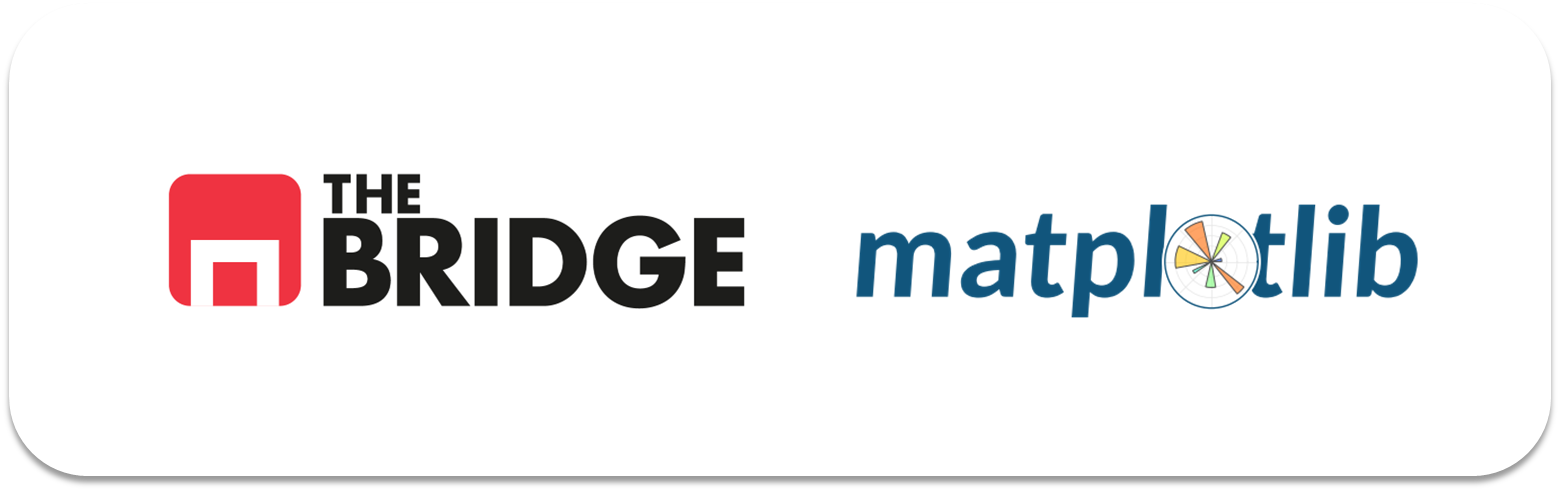

# Visualización con Matplotlib: Histogramas y diagramas de caja

Vamos a ver de forma sencilla como hacer los gráficos que nos generaban las funciones que empleamos en las visualizaciones analiticas del sprint anteior. En concreto, veremos los histogramas y los boxplots:

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


data = np.random.randn(1000) # de 1000 puntos

### Histogramas

Tan sencillo como:

(array([  7.,  16.,  58., 135., 218., 207., 165., 120.,  59.,  15.]),
 array([-3.02577729, -2.46646031, -1.90714333, -1.34782635, -0.78850937,
        -0.22919239,  0.33012459,  0.88944157,  1.44875855,  2.00807553,
         2.56739251]),
 <BarContainer object of 10 artists>)

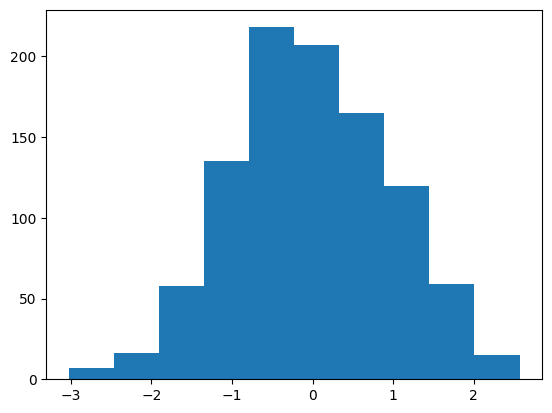

In [ ]:
plt.hist(data) # lo vemos con la función plt

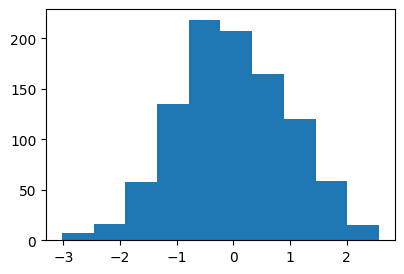

In [6]:
# lo vemos con los métodos:
fig = plt.figure(figsize= (4.5, 3)) # ancho 4.5, alto 3
ax = plt.axes()
ax.hist(data);


La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la visualización; aquí tienes un ejemplo de un histograma más personalizado (en el que tocamos el número de columnas `bins`, la transparencia y el color):


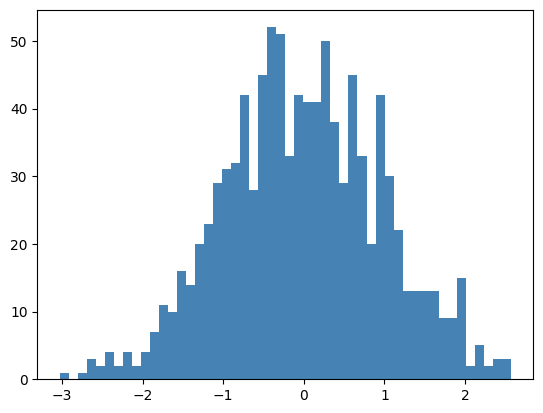

In [ ]:
plt.hist(data, 
         bins= 50, # numero de barras
         alpha = 0.7, # la transparencia
         color= "steelblue"); # color, y ; para no ver la devolución de valores

La transparencia es particularmente interesante para comparar histogramas o mostrar dicha comparación (y aprovecho para enseñarte un truco para cuando tengas argumentos repetidos que poner en tus llamadas a función):

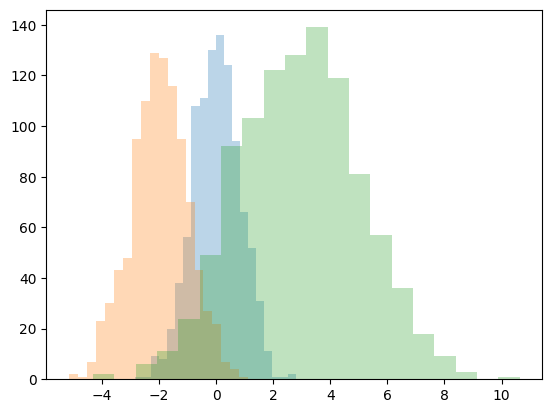

In [10]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# truco para repetir argumentos en funciones:
kwargs = dict(alpha = 0.3, bins = 20) # usaremos estos mismos parámetros para x1, x2 y x3
# con **kwargs le estamos pasando todos los kwargs como lista de argumentos
# y así las transparencias nos permiten superponer los 3 histogramas y compararlos
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);






Es también el momento de enseñarte a capturar los límites de esos bines:

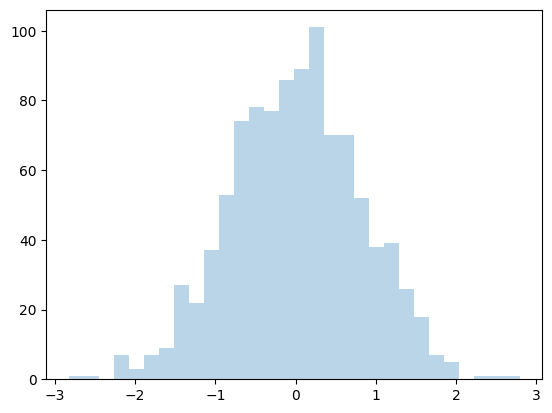

In [11]:
fig = plt.figure()
ax = plt.axes()
limites = ax.hist(x1, alpha= 0.3, bins=30)
# limites nos dará una tupla


Limites es una tupla en la que el primer valor son los conteos y el segundo los límites de las barras:

In [ ]:
# en bins tendremos una tupla
limites[0] # tenemos los conteos de x e y

array([  1.,   1.,   0.,   7.,   3.,   7.,   9.,  27.,  22.,  37.,  53.,
        74.,  78.,  77.,  86.,  89., 101.,  70.,  70.,  52.,  38.,  39.,
        26.,  18.,   7.,   5.,   0.,   1.,   1.,   1.])

In [ ]:
limites[1] # aqui estan los intervalos

array([-2.82965205, -2.64229276, -2.45493346, -2.26757417, -2.08021487,
       -1.89285557, -1.70549628, -1.51813698, -1.33077768, -1.14341839,
       -0.95605909, -0.7686998 , -0.5813405 , -0.3939812 , -0.20662191,
       -0.01926261,  0.16809669,  0.35545598,  0.54281528,  0.73017457,
        0.91753387,  1.10489317,  1.29225246,  1.47961176,  1.66697105,
        1.85433035,  2.04168965,  2.22904894,  2.41640824,  2.60376754,
        2.79112683])


### Boxplots

Los diagramas de caja eran esos diagramas en los que resumíamos las medidas de posición y añadíamos una posible formar de obtener valores anómalos, extremos o outliers. En forma de diagrama:


```text
     Q1-1.5IQR   Q1  mediana  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers/outlier
                       IQR

```

Donde IQR es el rango intercuartilico (la diferencia entre el valor de Q3 o tercer cuartil o percentil-75 y el valor de Q1 o primer cuartil, o percentil-25)

En matplotlib:

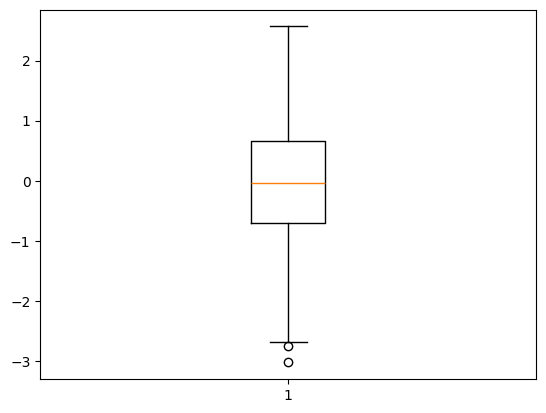

In [ ]:
plt.boxplot(data, whis= 1.5);
# whis es la longitud del whisker
# es el coeficiente por el que multiplicamos el el índice o rango intercuartilico

En el caso de matplotlib empleamos por defecto diagramas de caja verticales. Pero podemos cambiarlo:

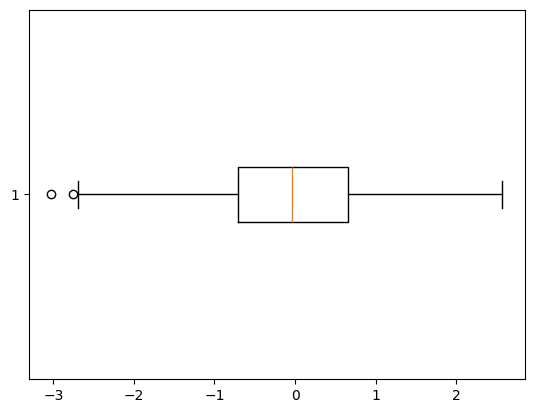

In [15]:
plt.boxplot(data, vert= False);

Y podemos mostrar varios juntos:

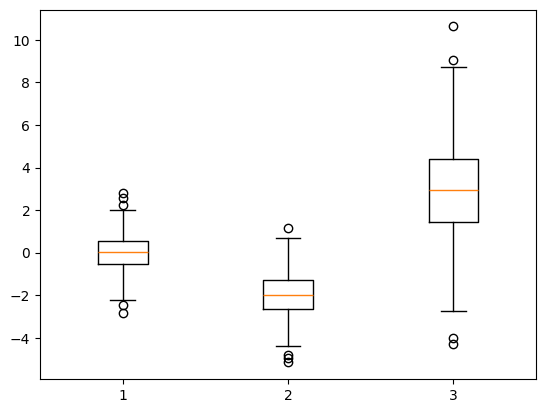

In [ ]:
plt.boxplot([x1,x2,x3]);
# así podemos escribir nuestros histogramas y diagramas 
# en vez de usar las funciones que nos dieron hechas